In [1]:
#imorting libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#lading csv
df=pd.read_csv("C:/Users/VINAY KUMAR PATEL/Downloads/machine learning/Dummy Data HSS.csv",header=0)

In [3]:
#showing data of csv
df.head()

,TV,Radio,Social_Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


<Axes: xlabel='count', ylabel='Influencer'>

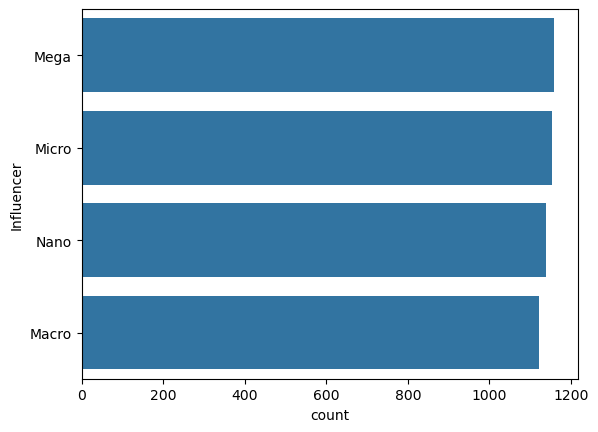

In [4]:
sns.countplot(df.Influencer)

In [5]:
df.describe()

,TV,Radio,Social_Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


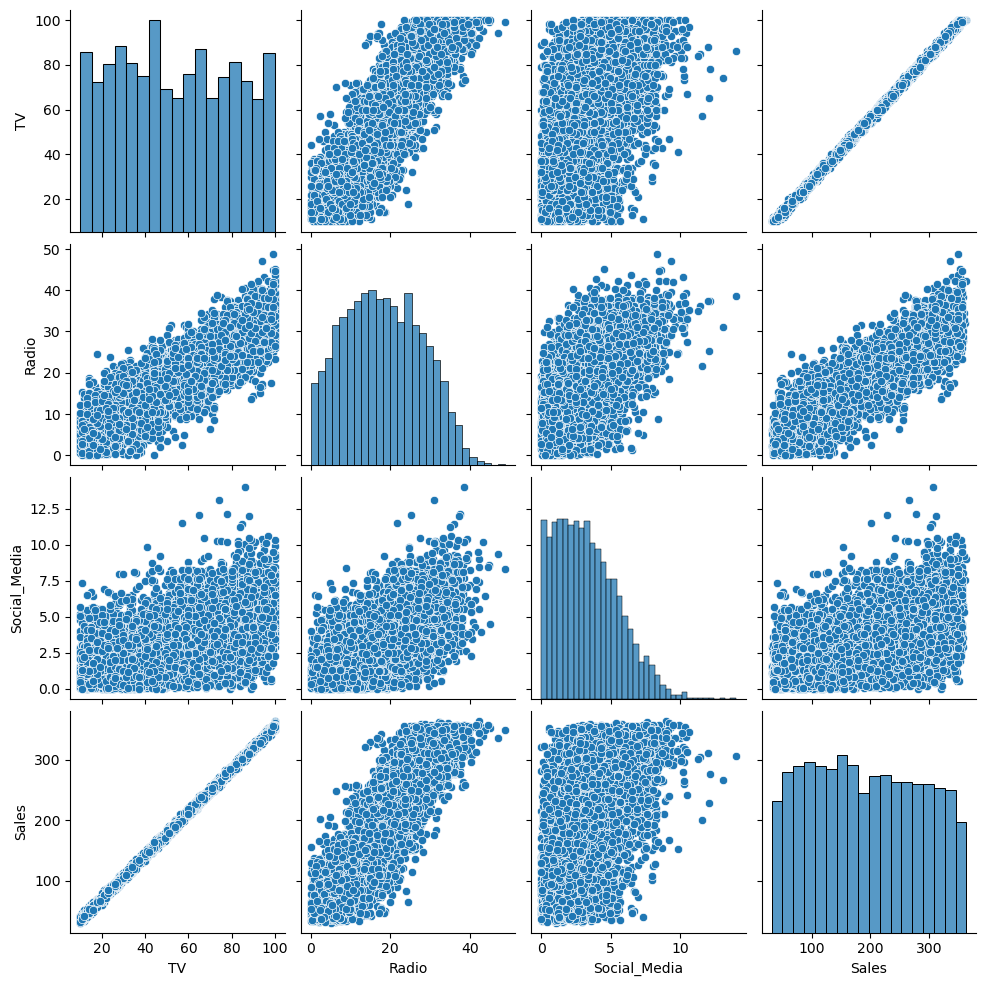

In [6]:
sns.pairplot(df)

In [7]:
uv=np.percentile(df.Sales,[99])[0]
print(uv)

nan


In [8]:
#showing info for checking null vlue
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social_Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [9]:
#filling null vlues
df.Social_Media=df.Social_Media.fillna(df.Social_Media.mean())

In [10]:
df.TV=df.TV.fillna(df.TV.mean())

In [11]:
df.Radio=df.Radio.fillna(df.Radio.mean())

In [12]:
df.Sales=df.Sales.fillna(df.Sales.mean())

In [13]:
df.describe()

,TV,Radio,Social_Media,Sales
count,4572.000000,4572.000000,4572.000000,4572.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.096461,9.672723,2.211218,93.071947
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.546519,1.529879,112.397660
50%,53.000000,17.875181,3.057150,189.632530
75%,77.000000,25.647476,4.805832,272.414914
max,100.000000,48.871161,13.981662,364.079751


In [14]:
#making dummies
df = pd.get_dummies(df).astype(int)

In [15]:
df.head()

,TV,Radio,Social_Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16,6,2,54,0,1,0,0
1,13,9,2,46,0,1,0,0
2,41,15,2,150,0,1,0,0
3,83,30,6,298,0,1,0,0
4,15,8,1,56,0,0,1,0


In [16]:
#now doing corelation analysis

In [19]:
df.corr()

,TV,Radio,Social_Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
TV,1.000000,0.866466,0.519813,0.996654,0.021332,-0.012630,-0.004862,-0.003643
Radio,0.866466,1.000000,0.599163,0.866919,0.009689,-0.005066,0.004366,-0.008930
Social_Media,0.519813,0.599163,1.000000,0.520910,0.013244,0.015553,-0.014891,-0.013864
Sales,0.996654,0.866919,0.520910,1.000000,0.019306,-0.011639,-0.004118,-0.003371
Influencer_Macro,0.021332,0.009689,0.013244,0.019306,1.000000,-0.332131,-0.331171,-0.328482
Influencer_Mega,-0.012630,-0.005066,0.015553,-0.011639,-0.332131,1.000000,-0.338211,-0.335465
Influencer_Micro,-0.004862,0.004366,-0.014891,-0.004118,-0.331171,-0.338211,1.000000,-0.334495
Influencer_Nano,-0.003643,-0.008930,-0.013864,-0.003371,-0.328482,-0.335465,-0.334495,1.000000


In [21]:
df.head()

,TV,Radio,Social_Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16,6,2,54,0,1,0,0
1,13,9,2,46,0,1,0,0
2,41,15,2,150,0,1,0,0
3,83,30,6,298,0,1,0,0
4,15,8,1,56,0,0,1,0


In [22]:
#simple linear reggresion by statsmodels.api

In [25]:
import statsmodels.api as sn

In [26]:
x=sn.add_constant(df['TV'])

In [27]:
lm=sn.OLS(df['Sales'],x).fit()

In [28]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 6.795e+05
Date:                Tue, 20 Aug 2024   Prob (F-statistic):               0.00
Time:                        03:48:08   Log-Likelihood:                -15764.
No. Observations:                4572   AIC:                         3.153e+04
Df Residuals:                    4570   BIC:                         3.155e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2240      0.259     -0.865      0.387      -0.731       0.284
TV             3.5548      0.004    824.339      0.000       3.546       3.563
==============================================================================
Omnibus:                     2876.666   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12136259.146
Skew:                           1.263   Prob(JB):                         0.00
Kurtosis:                     255.391   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#simple linear regression by sklearn

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
y= df['Sales']

In [32]:
x= df[['TV']]

In [33]:
lm2=LinearRegression()

In [34]:
lm2.fit(x,y)

LinearRegression()

In [35]:
print(lm2.intercept_,lm2.coef_)

-0.22395691168486564 [3.55479698]


In [36]:
lm2.predict(x)

array([ 56.65279484,  45.98840389, 145.52271945, ..., 156.18711041,
       252.16662899, 149.07751644])

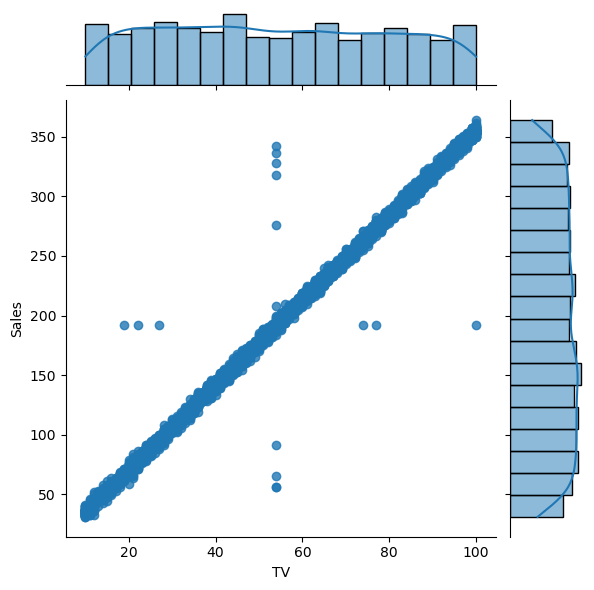

In [37]:
sns.jointplot(x=df['TV'],y=df['Sales'],data=df,kind='reg')

In [38]:
#multiple linear regression by statsmodels.api

In [39]:
import statsmodels.api as sn

In [40]:
x_multi=df.drop('Sales',axis=1)

In [41]:
x_multi.head()

,TV,Radio,Social_Media,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16,6,2,0,1,0,0
1,13,9,2,0,1,0,0
2,41,15,2,0,1,0,0
3,83,30,6,0,1,0,0
4,15,8,1,0,0,1,0


In [42]:
y_multi=df['Sales']

In [43]:
y_multi.head()

0     54
1     46
2    150
3    298
4     56
Name: Sales, dtype: int32

In [44]:
x_multicons=sn.add_constant(x_multi)

In [45]:
x_multicons.head()

,const,TV,Radio,Social_Media,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,1.0,16,6,2,0,1,0,0
1,1.0,13,9,2,0,1,0,0
2,1.0,41,15,2,0,1,0,0
3,1.0,83,30,6,0,1,0,0
4,1.0,15,8,1,0,0,1,0


In [46]:
# Check and convert data types
x_multi = x_multi.astype(float)
y = y_multi.astype(float)


In [47]:
lm_multi=sn.OLS(y_multi,x_multi).fit()

In [48]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.140e+05
Date:                Tue, 20 Aug 2024   Prob (F-statistic):               0.00
Time:                        03:48:12   Log-Likelihood:                -15747.
No. Observations:                4572   AIC:                         3.151e+04
Df Residuals:                    4565   BIC:                         3.155e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
TV                   3.5136      0.009    407.866      0.000       3.497       3.530
Radio                0.1211      0.025      4.885      0.000       0.072       0.170
Social_Media         0.0554      0.063      0.875      0.382      -0.069       0.180
Influencer_Macro    -0.5943      0.329     -1.808      0.071      -1.239       0.050
Influencer_Mega     -0.1577      0.322     -0.490      0.624      -0.789       0.473
Influencer_Micro    -0.1907      0.323     -0.591      0.554      -0.823       0.442
Influencer_Nano     -0.2364      0.324     -0.730      0.465      -0.871       0.398
==============================================================================
Omnibus:                     2804.421   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11615269.242
Skew:                           1.184   Prob(JB):                         0.00
Kurtosis:                     249.915   Cond. No.                         293.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lm3= LinearRegression()

In [51]:
lm3.fit(x_multi,y_multi)

LinearRegression()

In [52]:
print(lm3.intercept_,lm3.coef_)

-0.29476925087163863 [ 3.5135962   0.12109543  0.05543148 -0.29949599  0.13711641  0.10402484
  0.05835474]


In [53]:
# train test spil

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x_multi,y_multi,test_size=0.2,random_state=0)

In [56]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3657, 7) (915, 7) (3657,) (915,)


In [57]:
lm_a=LinearRegression()

In [58]:
lm_a.fit(x_train,y_train)

LinearRegression()

In [59]:
y_test_a=lm_a.predict(x_test)

In [60]:
y_train_a=lm_a.predict(x_train)

In [61]:
from sklearn.metrics import r2_score

In [62]:
r2_score(y_test,y_test_a)

0.994878370667851

In [63]:
r2_score(y_train,y_train_a)

0.9929841659751993

In [64]:
#Redge regression

In [120]:
from sklearn import preprocessing

In [128]:
scaler=preprocessing.StandardScaler().fit(x_train)

In [130]:
x_train_s= scaler.transform(x_train)

In [132]:
x_test_s= scaler.transform(x_test)

In [134]:
from sklearn.linear_model import Ridge

In [136]:
lm_r= Ridge(alpha=0.5)

In [138]:
lm_r.fit(x_train_s,y_train)

Ridge(alpha=0.5)

In [140]:
r2_score(y_test,lm_r.predict(x_test_s))

0.9948748439742471

In [142]:
from sklearn.model_selection import validation_curve

In [166]:
para_range=np.logspace(-2,8,100)
para_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [168]:
validation_curve?

Signature:
validation_curve(
    estimator,
    X,
    y,
    *,
    param_name,
    param_range,
    groups=None,
    cv=None,
    scoring=None,
    n_jobs=None,
    pre_dispatch='all',
    verbose=0,
    error_score=nan,
    fit_params=None,
)
Docstring:
Validation curve.

Determine training and test scores for varying parameter values.

Compute scores for an estimator with different values of a specified
parameter. This is similar to grid search with one parameter. However, this
will also compute training scores and is merely a utility for plotting the
results.

Read more in the :ref:`User Guide <validation_curve>`.

Parameters
----------
estimator : object type that implements the "fit" method
    An object of that type which is cloned for each validation. It must
    also implement "predict" unless `scoring` is a callable that doesn't
    rely on "predict" to compute a score.

X : {array-like, sparse matrix} of shape (n_samples, n_features)
    Training vector, where `n_samples` i

In [170]:
train_scores,test_scores = validation_curve(Ridge(),x_train_s,y_train,param_name="alpha",param_range=para_range,scoring="r2")

In [174]:
print(train_scores)
print(test_scores)

[[9.92103478e-01 9.93878437e-01 9.92686470e-01 9.93208430e-01
  9.93063363e-01]
 [9.92103478e-01 9.93878437e-01 9.92686470e-01 9.93208430e-01
  9.93063363e-01]
 [9.92103478e-01 9.93878437e-01 9.92686470e-01 9.93208430e-01
  9.93063363e-01]
 [9.92103478e-01 9.93878437e-01 9.92686470e-01 9.93208430e-01
  9.93063363e-01]
 [9.92103478e-01 9.93878437e-01 9.92686470e-01 9.93208430e-01
  9.93063363e-01]
 [9.92103478e-01 9.93878437e-01 9.92686470e-01 9.93208430e-01
  9.93063363e-01]
 [9.92103477e-01 9.93878437e-01 9.92686469e-01 9.93208429e-01
  9.93063363e-01]
 [9.92103477e-01 9.93878436e-01 9.92686469e-01 9.93208429e-01
  9.93063362e-01]
 [9.92103476e-01 9.93878436e-01 9.92686468e-01 9.93208428e-01
  9.93063362e-01]
 [9.92103475e-01 9.93878434e-01 9.92686467e-01 9.93208427e-01
  9.93063361e-01]
 [9.92103473e-01 9.93878433e-01 9.92686466e-01 9.93208426e-01
  9.93063359e-01]
 [9.92103471e-01 9.93878430e-01 9.92686463e-01 9.93208423e-01
  9.93063356e-01]
 [9.92103466e-01 9.93878426e-01 9.926864

In [176]:
train_mean=np.mean(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)

In [178]:
max(test_mean)

0.9929587723358575

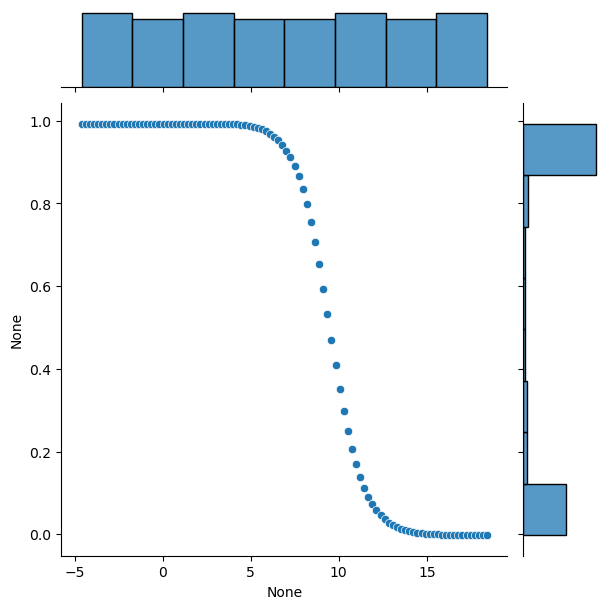

In [180]:
sns.jointplot(x=np.log(para_range),y=test_mean)

In [182]:
np.where(test_mean==max(test_mean))

(array([0], dtype=int64),)

In [186]:
para_range[0]

0.01

In [190]:
lm_r_best=Ridge(alpha=para_range[0])

In [192]:
lm_r_best.fit(x_train_s,y_train)

Ridge(alpha=0.01)

In [194]:
r2_score(y_test,lm_r_best.predict(x_test_s))

0.9948783012671324

In [196]:
r2_score(y_train,lm_r_best.predict(x_train_s))

0.9929841659476699